In [1]:
!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=60cd2df4083fe4dfeebd5c3790cbf0d2df85b279bdbc2a1b30497b6482369693
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
!python -m pip install findspark


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
sc = SparkContext.getOrCreate(SparkConf().setMaster("local[*]"))
spark = SparkSession.builder.getOrCreate()

In [4]:
df = spark.read.csv('/content/BankChurners.csv', inferSchema=True, header=True)
df.show(5)

+---------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+----------------------+---------------------+------------+-------------------+---------------+--------------------+---------------+--------------+-------------------+---------------------+----------------------------------------------------------------------------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------+
|CLIENTNUM|   Attrition_Flag|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|Months_Inactive_12_mon|Contacts_Count_12_mon|Credit_Limit|Total_Revolving_Bal|Avg_Open_To_Buy|Total_Amt_Chng_Q4_Q1|Total_Trans_Amt|Total_Trans_Ct|Total_Ct_Chng_Q4_Q1|Avg_Utilization_Ratio|Naive_Bayes_Classifier_Attrit

In [5]:
df.columns


['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

In [6]:
df.printSchema()


root
 |-- CLIENTNUM: integer (nullable = true)
 |-- Attrition_Flag: string (nullable = true)
 |-- Customer_Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Dependent_count: integer (nullable = true)
 |-- Education_Level: string (nullable = true)
 |-- Marital_Status: string (nullable = true)
 |-- Income_Category: string (nullable = true)
 |-- Card_Category: string (nullable = true)
 |-- Months_on_book: integer (nullable = true)
 |-- Total_Relationship_Count: integer (nullable = true)
 |-- Months_Inactive_12_mon: integer (nullable = true)
 |-- Contacts_Count_12_mon: integer (nullable = true)
 |-- Credit_Limit: double (nullable = true)
 |-- Total_Revolving_Bal: integer (nullable = true)
 |-- Avg_Open_To_Buy: double (nullable = true)
 |-- Total_Amt_Chng_Q4_Q1: double (nullable = true)
 |-- Total_Trans_Amt: integer (nullable = true)
 |-- Total_Trans_Ct: integer (nullable = true)
 |-- Total_Ct_Chng_Q4_Q1: double (nullable = true)
 |-- Avg_Utilization_Ratio: double (n

In [7]:
df.describe('Attrition_Flag').show(10)


+-------+-----------------+
|summary|   Attrition_Flag|
+-------+-----------------+
|  count|            10127|
|   mean|             NULL|
| stddev|             NULL|
|    min|Attrited Customer|
|    max|Existing Customer|
+-------+-----------------+



In [8]:
df.select('Attrition_Flag','Customer_Age').show(10)


+-----------------+------------+
|   Attrition_Flag|Customer_Age|
+-----------------+------------+
|Existing Customer|          45|
|Existing Customer|          49|
|Existing Customer|          51|
|Existing Customer|          40|
|Existing Customer|          40|
|Existing Customer|          44|
|Existing Customer|          51|
|Existing Customer|          32|
|Existing Customer|          37|
|Existing Customer|          48|
+-----------------+------------+
only showing top 10 rows



In [9]:
df.groupby('Customer_Age').agg({'Total_Revolving_Bal': 'mean'}).show()


+------------+------------------------+
|Customer_Age|avg(Total_Revolving_Bal)|
+------------+------------------------+
|          31|      1098.7142857142858|
|          65|      1251.3168316831684|
|          53|      1227.6511627906978|
|          34|      1295.7808219178082|
|          28|      1006.6206896551724|
|          26|       1105.974358974359|
|          27|                 1175.75|
|          44|                1117.924|
|          47|      1139.0229645093946|
|          52|       1204.877659574468|
|          40|       1175.152354570637|
|          57|       1251.134529147982|
|          54|      1190.6091205211726|
|          48|       1130.175847457627|
|          64|      1161.7441860465117|
|          41|      1122.7625329815303|
|          43|      1155.6109936575053|
|          37|      1137.8653846153845|
|          61|      1209.9569892473119|
|          35|      1161.2173913043478|
+------------+------------------------+
only showing top 20 rows



In [10]:
df.groupby('Customer_Age').count().show()


+------------+-----+
|Customer_Age|count|
+------------+-----+
|          31|   91|
|          65|  101|
|          53|  387|
|          34|  146|
|          28|   29|
|          26|   78|
|          27|   32|
|          44|  500|
|          47|  479|
|          52|  376|
|          40|  361|
|          57|  223|
|          54|  307|
|          48|  472|
|          64|   43|
|          41|  379|
|          43|  473|
|          37|  260|
|          61|   93|
|          35|  184|
+------------+-----+
only showing top 20 rows



In [11]:
from pyspark.mllib.stat import Statistics

# select variables to check correlation
df_features = df.select("Customer_Age","Total_Trans_Amt","Total_Trans_Ct","Total_Revolving_Bal")

# create RDD table for correlation calculation
rdd_table = df_features.rdd.map(lambda row: row[0:])

# get the correlation matrix
corr_mat=Statistics.corr(rdd_table, method="pearson")
corr_mat

array([[ 1.        , -0.04644649, -0.06709686,  0.01477989],
       [-0.04644649,  1.        ,  0.80719203,  0.06437048],
       [-0.06709686,  0.80719203,  1.        ,  0.05606049],
       [ 0.01477989,  0.06437048,  0.05606049,  1.        ]])

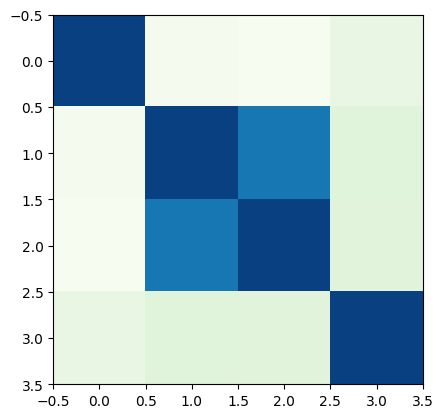

In [12]:
plt.imshow(corr_mat,cmap='GnBu')


In [13]:
print('Data frame describe (string and numeric columns only):')
df.describe().toPandas()

print(f'There are total {df.count()} row, Let print first 2 data rows:')
df.limit(2).toPandas()

Data frame describe (string and numeric columns only):
There are total 10127 row, Let print first 2 data rows:


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994


In [14]:
Months_on_book = df.groupBy('Months_on_book').count()

Total_Revolving_Bal = df.groupBy('Total_Revolving_Bal').count()

In [15]:
Months = pd.DataFrame(Months_on_book.rdd.map(lambda line: line.asDict()).collect()).head(20)
Revolving_Bal = pd.DataFrame(Total_Revolving_Bal.rdd.map(lambda line: line.asDict()).collect()).head(20)

In [16]:
Months.head(10)
Revolving_Bal.head(10)

,Total_Revolving_Bal,count
0,1580,8
1,1591,6
2,1829,8
3,1645,2
4,1342,5
5,1959,3
6,1088,4
7,1238,2
8,471,1
9,2142,2
